In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [11]:
filepath = 'data/resources.csv'
filepath2 = 'data/train.csv'

In [6]:
rdf = pd.read_csv(filepath)

In [7]:
rdf.head()

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45
3,p069063,"Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...",2,13.59
4,p069063,EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...,3,24.95


In [9]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1541272 entries, 0 to 1541271
Data columns (total 4 columns):
id             1541272 non-null object
description    1540980 non-null object
quantity       1541272 non-null int64
price          1541272 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 47.0+ MB


In [5]:
rdf.shape

(1541272, 4)

In [12]:
tdf = pd.read_csv(filepath2)

In [13]:
tdf.shape

(182080, 16)

In [16]:
# Not many nulls, but essay 3 & 4 are only answered a third of the time
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182080 entries, 0 to 182079
Data columns (total 16 columns):
id                                              182080 non-null object
teacher_id                                      182080 non-null object
teacher_prefix                                  182076 non-null object
school_state                                    182080 non-null object
project_submitted_datetime                      182080 non-null object
project_grade_category                          182080 non-null object
project_subject_categories                      182080 non-null object
project_subject_subcategories                   182080 non-null object
project_title                                   182080 non-null object
project_essay_1                                 182080 non-null object
project_essay_2                                 182080 non-null object
project_essay_3                                 6374 non-null object
project_essay_4                        

In [15]:
tdf.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,NaN,My students need the 3doodler. We are an SEM s...,5,1
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,0
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,My students need a water filtration system for...,42,1


#### Let's look at the training dataset columns

#### teacher prefix

In [17]:
tdf['teacher_prefix'].value_counts()

Mrs.       95405
Ms.        65066
Mr.        17667
Teacher     3912
Dr.           26
Name: teacher_prefix, dtype: int64

9-to-1 female to male ratio, maybe make a gender column

#### school state

In [18]:
# No surprises here, would be interesting to see states unusually represented high or low
tdf.school_state.value_counts().head()

CA    25695
TX    12304
NY    12157
FL    10359
NC     8463
Name: school_state, dtype: int64

#### Project Submit Date

In [20]:
tdf['submit_date'] = pd.to_datetime(tdf.project_submitted_datetime)

In [31]:
tdf.submit_date = tdf.submit_date.dt.date.values

In [33]:
tdf.submit_date.head()

0    2016-11-18
1    2017-04-26
2    2017-01-01
3    2016-08-12
4    2016-08-06
Name: submit_date, dtype: object

In [41]:
tdf.submit_date.min()

Timestamp('2016-04-27 00:00:00')

In [42]:
tdf.submit_date.max()

Timestamp('2017-04-30 00:00:00')

Looks like it's projects submitted from 4/27/16 to 4/30/17

#### project grade category

In [43]:
tdf.project_grade_category.value_counts()

Grades PreK-2    73890
Grades 3-5       61682
Grades 6-8       28197
Grades 9-12      18311
Name: project_grade_category, dtype: int64

Most common are elementary school

#### project subject categories

In [45]:
tdf.project_subject_categories.value_counts().head()

Literacy & Language                    39257
Math & Science                         28555
Literacy & Language, Math & Science    24499
Health & Sports                        16951
Music & The Arts                        8527
Name: project_subject_categories, dtype: int64

In [46]:
tdf.project_subject_categories.value_counts().tail()

Music & The Arts, Applied Learning         21
History & Civics, Health & Sports          20
Math & Science, Warmth, Care & Hunger      19
Music & The Arts, Warmth, Care & Hunger     3
History & Civics, Warmth, Care & Hunger     1
Name: project_subject_categories, dtype: int64

Maybe some manual grouping we can do here

#### Project Resource Summary

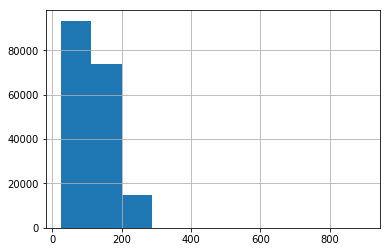

In [51]:
tdf.project_resource_summary.str.len().hist()

In [52]:
tdf.project_resource_summary.str.len().max()

902

There are a few outlier project resource summary lengths, but otherwise they are at most a couple hundred words.

#### Prev Posted Projects

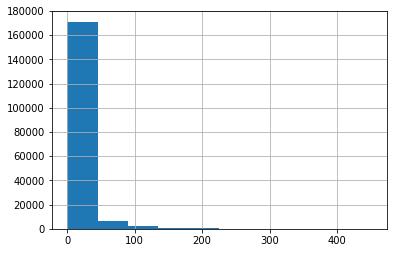

In [53]:
tdf.teacher_number_of_previously_posted_projects.hist()

In [55]:
round(tdf.teacher_number_of_previously_posted_projects.mean(), 2)

11.24

In [56]:
round(tdf.teacher_number_of_previously_posted_projects.median(), 2)

2.0

The median a teacher submits a project is twice, but there's a long tail that brings the average to 11

#### Let's see how acceptance rate varies with a few variables

Teacher Gender

In [62]:
prefixAceptance = tdf[["teacher_prefix","project_is_approved"]].groupby("teacher_prefix").mean()
prefixAceptance["prefix"] = prefixAceptance.index

genderDictionary = {"Ms.": "Female", "Mrs.":"Female", "Mr.":"Male", "Teacher":"Neutral", "Dr.":"Neutral", np.nan:"Neutral"  }
tdf["gender"] = tdf.teacher_prefix.map( genderDictionary )
genderAceptance = tdf[["gender","project_is_approved"]].groupby("gender").mean()

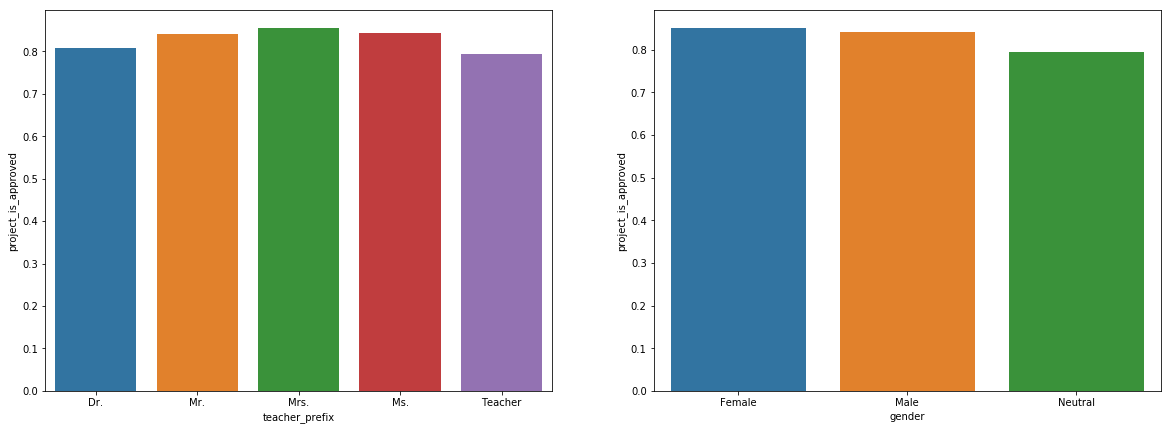

In [63]:
fig  = plt.figure(figsize=(20,7))
ax1 = plt.subplot(1,2,1)
sns.barplot(x = prefixAceptance.index, y =prefixAceptance.project_is_approved )
ax2 = plt.subplot(1,2,2)
sns.barplot(x = genderAceptance.index, y =genderAceptance.project_is_approved )

Project cost

In [70]:
rdf.head()

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45
3,p069063,"Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...",2,13.59
4,p069063,EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...,3,24.95


In [71]:
rdf['total_cost'] = rdf.quantity * rdf.price

In [72]:
rdf.head()

,id,description,quantity,price,total_cost
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95,44.85
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45,8.45
3,p069063,"Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...",2,13.59,27.18
4,p069063,EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...,3,24.95,74.85


In [65]:
tdf.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,submit_date,gender,title
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1,2016-11-18,Female,Na
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0,2017-04-26,Female,Na
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,NaN,My students need the 3doodler. We are an SEM s...,5,1,2017-01-01,Female,Na
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,0,2016-08-12,Male,Na
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,My students need a water filtration system for...,42,1,2016-08-06,Male,Na


tbc...